In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model

In [2]:
# Define dataset paths
data_dir = r"C:\Project 3"
train_dir = r"C:\Project 3\Train"
val_dir = r"C:\Project 3\Validate"
test_dir = r"C:\Project 3\Test"


In [3]:
# Image parameters
img_height, img_width = 128, 128
batch_size = 32

In [4]:
# Data augmentation and preprocessing (for training & validation)
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  
)

In [5]:
# Training generator (70%)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="binary",
    subset="training"
)

Found 364 images belonging to 2 classes.


In [6]:
# Validation generator (20%)
val_generator = datagen.flow_from_directory(
    train_dir,  # ✅ Validation from the same train directory
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="binary",
    subset="validation"
)

Found 89 images belonging to 2 classes.


In [7]:
# Testing generator (10%) - No augmentation, just rescaling
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False  
)

Found 21 images belonging to 2 classes.


In [8]:
# Testing generator (10%) - No augmentation, just rescaling
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False  
)

Found 21 images belonging to 2 classes.


In [9]:
# Load a pretrained model (ResNet50)
base_model = keras.applications.ResNet50(input_shape=(img_height, img_width, 3), include_top=False, weights="imagenet")
base_model.trainable = False  # Freeze the base model

In [10]:
# Define the model
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [11]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [12]:
# Train the model
epochs = 50
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

c:\Users\Priyanshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 587ms/step - accuracy: 0.4979 - loss: 0.7345

c:\Users\Priyanshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 991ms/step - accuracy: 0.4981 - loss: 0.7347 - val_accuracy: 0.4831 - val_loss: 0.7039
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 742ms/step - accuracy: 0.5018 - loss: 0.7291 - val_accuracy: 0.4382 - val_loss: 0.6920
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 760ms/step - accuracy: 0.5215 - loss: 0.7061 - val_accuracy: 0.5169 - val_loss: 0.6918
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 817ms/step - accuracy: 0.5103 - loss: 0.7094 - val_accuracy: 0.5169 - val_loss: 0.6910
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 956ms/step - accuracy: 0.5108 - loss: 0.7014 - val_accuracy: 0.5169 - val_loss: 0.6912
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 945ms/step - accuracy: 0.4341 - loss: 0.7128 - val_accuracy: 0.5169 - val_loss: 0.6919
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 919ms/step - accuracy: 0.5471 - loss: 0.6839 - val_accuracy: 0.4719 - val_loss: 0.6969
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 944ms/step - accuracy: 0.5043 - loss: 0.6962 - val_accuracy: 0.5506 

In [13]:
# Save the model
model.save("ai_vs_real_resnet_model3.h5")

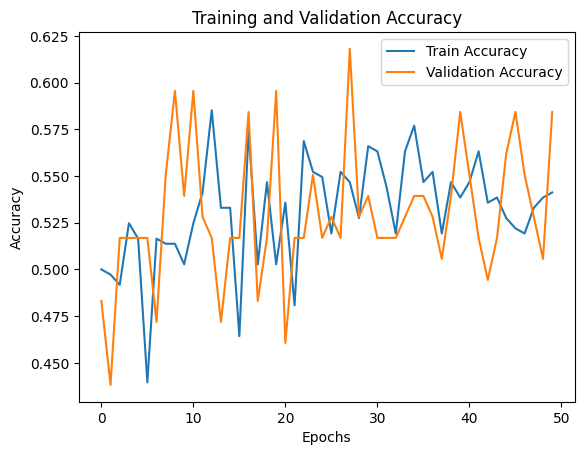

In [14]:
# Plot accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [15]:
# ✅ Load the trained model for testing
model = load_model("ai_vs_real_resnet_model3.h5")

In [16]:
# Testing the model on unseen images
model = keras.models.load_model("ai_vs_real_resnet_model3.h5")

# Recompile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")



for i in os.listdir(test_dir):
    img_path = os.path.join(test_dir, i)
    if os.path.isdir(img_path):  # Skip directories
        continue
    
    img = image.load_img(img_path, target_size=(128, 128))
    plt.imshow(img)
    plt.show()

    #Preprocess image
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    X = keras.applications.efficientnet.preprocess_input(X)  

    # Get prediction
    val = model.predict(X)

    # Print result
    if val[0][0] > 0.5:
        print("Real Image ")
    else:
        print("AI Image ")

c:\Users\Priyanshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7143 - loss: 0.6603
Test Accuracy: 71.43%


In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Load trained model
model = keras.models.load_model("ai_vs_real_resnet_model3.h5")

# Define test image directory
test_dir = r"C:\Project\Testing"

# Iterate over images in test directory
for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)

    # Skip directories (if any)
    if os.path.isdir(img_path):
        continue

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128, 128))  # Resize to match model input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch
    img_array = keras.applications.efficientnet.preprocess_input(img_array)  # Normalize

    # Make prediction
    prediction = model.predict(img_array)

    # Determine class label
    label = "Real Image " if prediction[0][0] > 0.5 else "AI-Generated Image "

    # Display image with label
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.title(label, fontsize=14, fontweight="bold", color="blue" if "Real" in label else "red")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


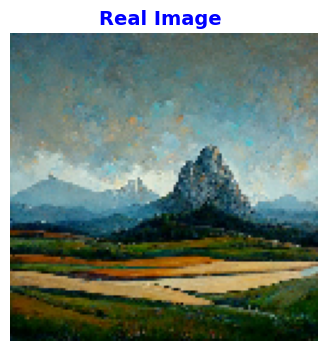

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


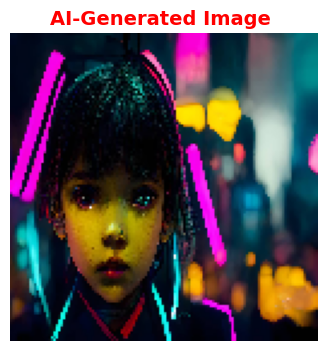

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


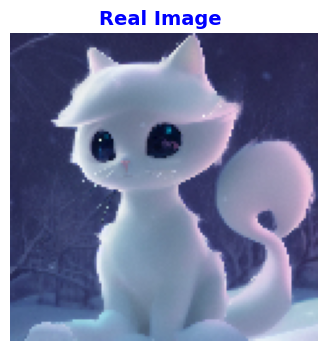

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


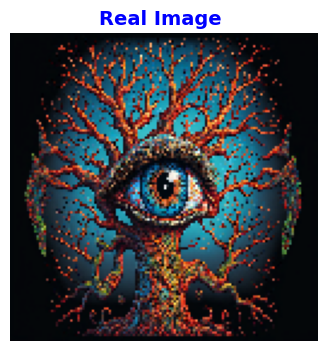

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


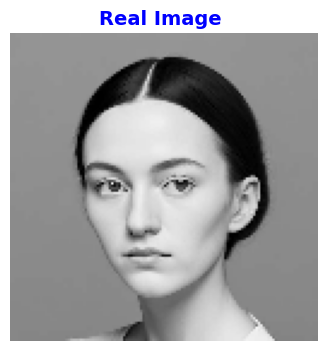

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


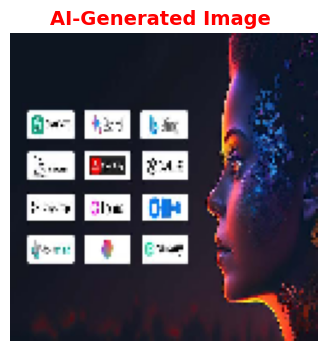

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


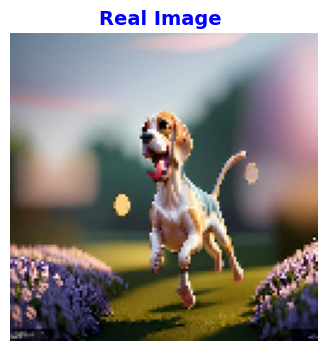

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


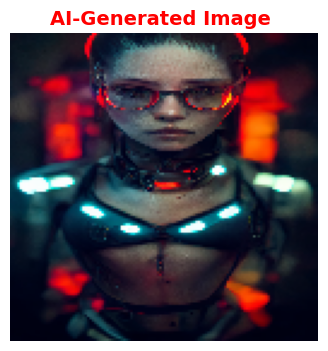

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


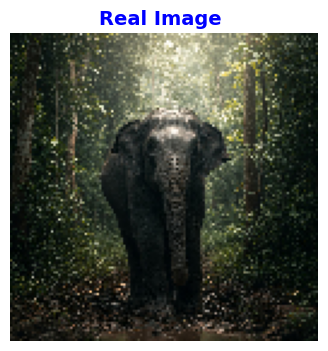

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


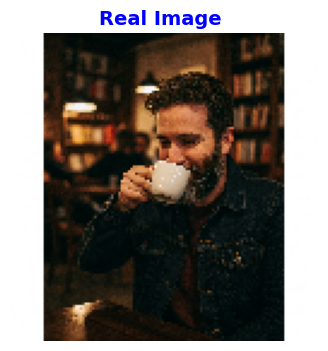

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


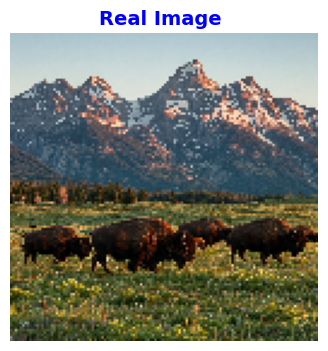

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


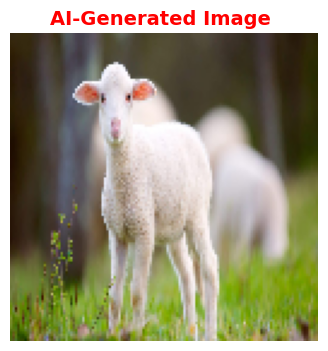

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


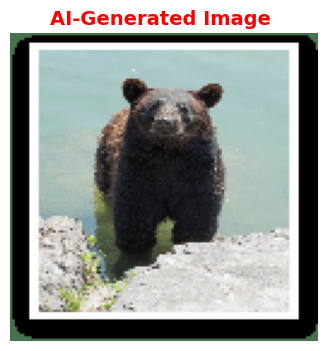

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


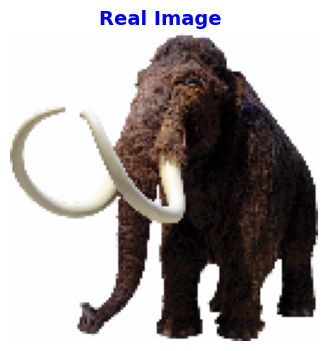

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


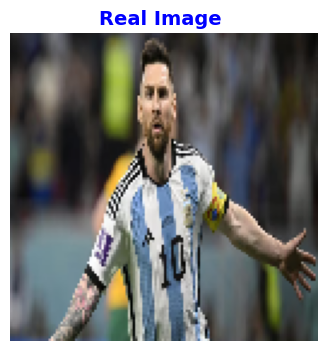

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing import image

# Load trained model
model = keras.models.load_model("ai_vs_real_efficientnet_model.h5")

# Define test image directory
test_dir = r"C:\Project\Test"

# Iterate over images in test directory
for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)

    # Skip directories (avoid permission errors)
    if not os.path.isfile(img_path):
        continue  # Skip folders inside the test directory

    try:
        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(128, 128))  # Resize image
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Expand dims for batch
        img_array = keras.applications.efficientnet.preprocess_input(img_array)  # Normalize

        # Make prediction
        prediction = model.predict(img_array)

        #  Determine class label
        label = "Real Image " if prediction[0][0] > 0.5 else "AI-Generated Image "

        #  Display image with label
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.axis("off")  # Hide axes
        plt.title(label, fontsize=14, fontweight="bold", color="blue" if "Real" in label else "red")
        plt.show()
    
    except Exception as e:
        print(f"Error loading image {img_name}: {e}")